# Calculate optimal 2 by 2 with 45 degree angles bigger env

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

prefill replay memory
start training
 new max record arrange grid:  1.0076271631908302
 new max record arrange grid:  1.6369521984468576
 new max record arrange grid:  1.887975105768082
 new max record arrange grid:  1.9657568516986021
 new max record arrange grid:  2.2167797590198264
   10 mean training reward:  1.56
 new max record arrange grid:  2.2592061658910194
 new max record arrange grid:  2.5102290732122436
   20 mean training reward:  1.84
   30 mean training reward:  1.78
   40 mean training reward:  1.46
 new max record arrange grid:  2.7612519805334683
   50 mean training reward:  1.53
   60 mean training reward:  1.55
   70 mean training reward:  1.51
   80 mean training reward:  1.62
   90 mean training reward:  1.79
  100 mean training reward:  1.83
  110 mean training reward:  1.90
  120 mean training reward:  1.58
  130 mean training reward:  1.65
  140 mean training reward:  1.84
  150 mean training reward:  1.84
  160 mean training reward:  1.82
  170 mean training 

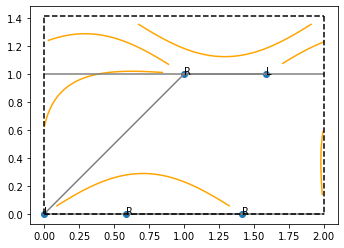

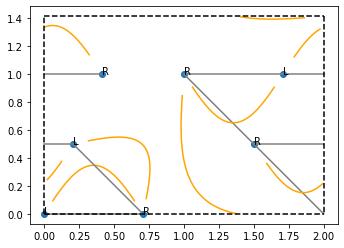

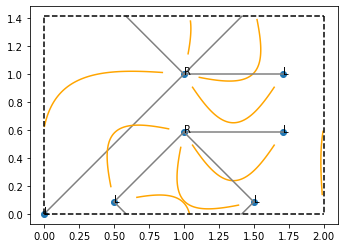

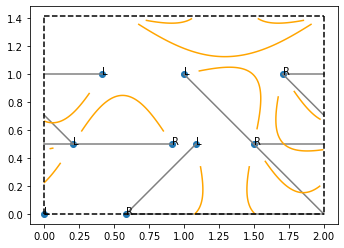

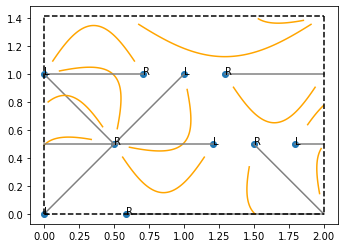

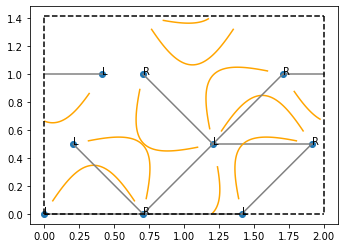

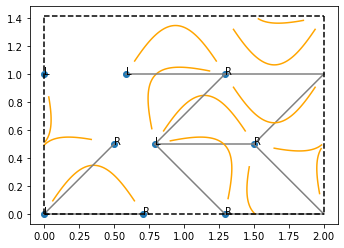

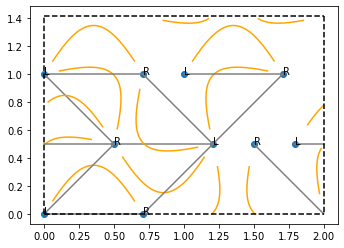

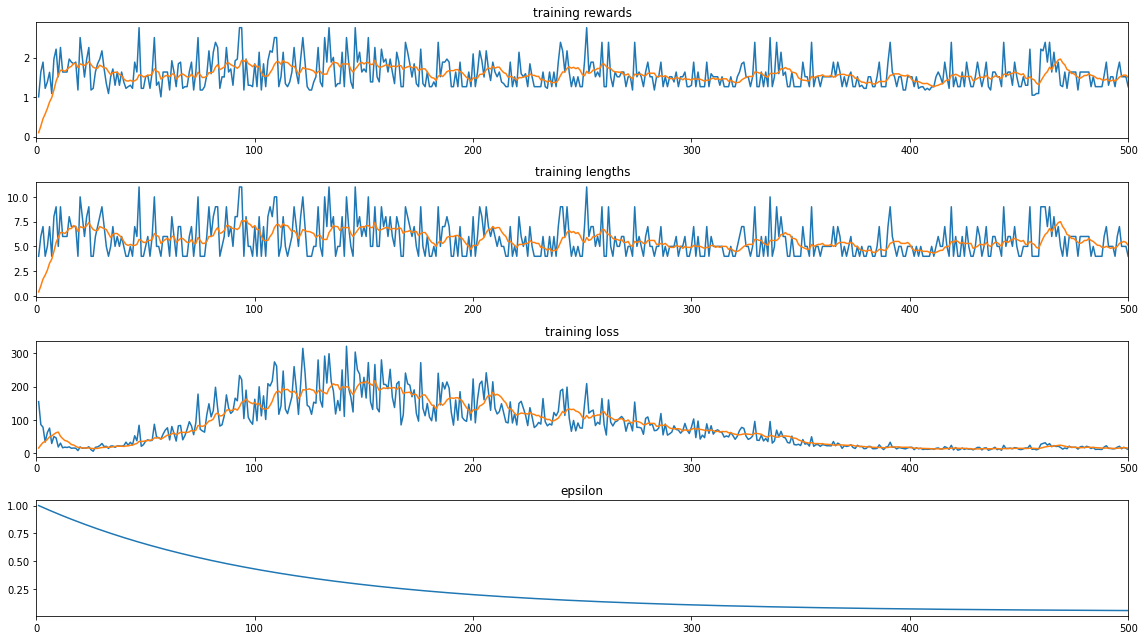

[1.0076271631908302, 1.0076271631908302, 1.6369521984468576, 1.6369521984468576, 1.887975105768082, 1.887975105768082, 1.9657568516986021, 1.9657568516986021, 2.2167797590198264, 2.2167797590198264, 2.2592061658910194, 2.2592061658910194, 2.5102290732122436, 2.5102290732122436, 2.7612519805334683, 2.7612519805334683]
[1, 2, 2, 3, 3, 8, 8, 9, 9, 11, 11, 20, 20, 47, 47, 500]


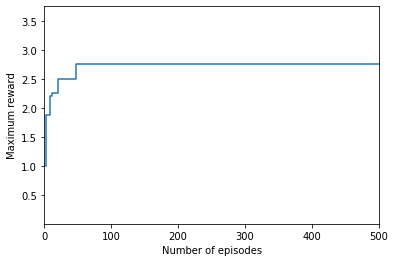

In [2]:
# we start from scratch here
subgraphs = Subgraphs(angles=[0, 45, 135, 180], 
# subgraphs = Subgraphs(angles=[0, 30, 60, 90, 120, 150, 180],
                      lengths=[np.sqrt(2)/2, np.sqrt(2)])

# create the environment
y = np.sqrt(2) + 1
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=y,
                           subgraphs=subgraphs)

# Angles length + length -2 to account for the symmetric angles + 4 metadata inputs = the inputs

NUM_EPISODES = 500#15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=10, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64, #8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000, #16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

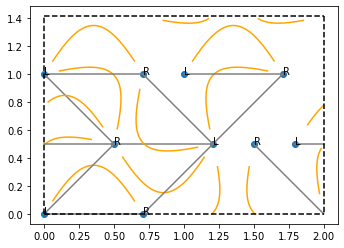

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [4]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [5]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)